## Explore aggregated output

This script is used to explore the aggregated output of particular cases.

* See where most ensemble members failed
* See histograms of metrics for an ensemble

In [44]:
import pandas as pd
import glob
import os
import netCDF4 as nc4
import sys
sys.path.append('/glade/u/home/adamhb/Earth-System-Model-Tools')
import esm_tools
from fields import fields
import re
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
np.set_printoptions(threshold=1000)
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)

## Load aggregated metrics

In [69]:
# Large ensembles ensembles

#afterBugFix_1280_041923_
df1 = pd.read_csv('/glade/work/adamhb/processed_output/CZ2_equilibrium_041924_XX_-17e2acb6a_FATES-1449c787/afterBugFix_1280_041923_metrics_and_params.csv')

#afterOakFix
df2 = pd.read_csv('/glade/work/adamhb/processed_output/CZ2_equilibrium_042324_XX_-17e2acb6a_FATES-1449c787/afterOakFix_2560_042323_metrics_and_params.csv')

#df3 = pd.concat([df1,df2],axis = 0)
#df3.to_csv('/glade/work/adamhb/processed_output/CZ2_equilibrium_041924_and_042324_XX.csv')

# The below was used for the first "equilibrium" (450) year ensemble below
df3 = pd.read_csv('/glade/work/adamhb/processed_output/CZ2_equilibrium_700yrs_042524_01_-17e2acb6a_FATES-1449c787/equilibrium_700yrs_042524_metrics_and_params.csv')

df4 = pd.read_csv('/glade/work/adamhb/processed_output/ml_supported_ensemble_050224_XX_-17e2acb6a_FATES-1449c787/ml_supported_ensemble_2560_050224_metrics_and_params.csv')

# 700 yr equilib 050924
df5 = pd.read_csv('/glade/work/adamhb/processed_output/equilibrium_700yrs_050924_01/equilibrium_700yrs_050924_metrics_and_params.csv')

dfs = [df1,df2,df3,df4,df5]

In [ ]:
df5['Fail

In [76]:
for i,df in enumerate(dfs):
    print("df",i,"has",len(df),"members")
    print("number of members with coexistence",len(df.loc[df['FailedPFTs'] == 0]))

df 0 has 896 members
number of members with coexistence 9
df 1 has 2176 members
number of members with coexistence 12
df 2 has 99 members
number of members with coexistence 2
df 3 has 2304 members
number of members with coexistence 74
df 4 has 82 members
number of members with coexistence 19


In [75]:
896 + 2176

3072

In [79]:
3072 + 2304

5376

## Constants

In [57]:
basic_metrics = [
'inst_tag',
#'AGCD',
'BA_conifer',
#'BA_trees',
'BA_pine',
'BA_cedar',
'BA_fir',
#'BA_shrub',
'BA_oak',
'TreeStemD',
'TreeStemD_40',
'TreeStemD_80',
'ShannonE',
'FailedPFTs',
'Pct_shrub_cover_canopy',
'Pct_shrub_cover',
'NPP',
'Burned_area',
'AWFI',
'Pct_high_severity_1025',
'Pct_high_severity_1700']
#'Pct_high_severity_3500']

## Functions

In [47]:
def make_histograms_of_metrics(df,metrics):
    
    for metric in metrics:
        plt.hist(df[metric], bins=25, alpha=0.9, color='white', edgecolor='black', label = "Model")
        if metric in vln.keys():
            plt.xlabel(vln[metric])
        else:
            plt.xlabel(metric)
        plt.ylabel("Number of ensemble members")
        plt.legend()
        plt.tight_layout()
        plt.show()

def criterion_pass_rate(df,criterion ='enough_pine'):
    n_members = len(df)
    pct_passed = sum(df[criterion])/n_members * 100
    print(pct_passed,"% passed",criterion)


vln = {'Burned_area':'Burned area [% yr-1]',
       'Pct_high_severity_3500':'High severity fire [% of fires > 3500 kW m-1]',
       'Pct_high_severity_1700':'High severity fire [% of fires > 1700 kW m-1]',
       'AGCD':'Above-ground carbon density [Kg C m-2]',
       'BA_conifer':'Conifer basal area (dbh > 10 cm) [m-2 ha-1]',
       'Pct_shrub_cover_canopy':'Shrub cover [%]',
       'VCD':'Vegetation carbon density [Kg C m-2]',
       'Pct_conifer_cover_canopy':'Conifer cover [%]',
       'Pct_oak_cover_canopy':'Oak cover [%]',
       'Pct_pine_cover_canopy':'Pine cover [%]',
       'Pct_cedar_cover_canopy':'Cedar cover [%]',
       'Pct_fir_cover_canopy':'Fir cover [%]',
       'BA_pine':'Pine basal area (dbh > 10 cm) [m-2 ha-1]',
       'BA_cedar':'Cedar basal area (dbh > 10 cm) [m-2 ha-1]',
       'BA_fir':'Fir basal area (dbh > 10 cm) [m-2 ha-1]',
       'BA_oak':'Oak  basal area (dbh > 10 cm) [m-2 ha-1]',
       'TreeStemD':'Tree Stem Density [N ha-1] (> 10 cm dbh)',
       'Combustible_fuel':'Combustible fuel [Kg C m-2]',
       'NPP':'NPP',
       'mort_pine_fire_per_cap':'Pine fire mort [per capita (%) yr-1]',
       'mort_pine_cstarve_per_cap':'Pine cstarve mort [per capita (%) yr-1]',
       'mort_pine_hydr_per_cap':'Pine hydr failure mort [per capita (%) yr-1]',
       'mort_cedar_fire_per_cap':'Cedar fire mort [per capita (%) yr-1]',
       'mort_cedar_cstarve_per_cap':'Cedar cstarve mort [per capita (%) yr-1]',
       'mort_cedar_hydr_per_cap':'Cedar hydr failure mort [per capita (%) yr-1]',
       'mort_fir_fire_per_cap':'Fir fire mort [per capita (%) yr-1]',
       'mort_fir_cstarve_per_cap':'Fir cstarve mort [per capita (%) yr-1]',
       'mort_fir_hydr_per_cap':'Fir hydr failure mort [per capita (%) yr-1]',
       'mort_shrub_fire_per_cap':'Shrub fire mort [per capita (%) yr-1]',
       'mort_shrub_cstarve_per_cap':'Shrub cstarve mort [per capita (%) yr-1]',
       'mort_shrub_hydr_per_cap':'Shrub hydr failure mort [per capita (%) yr-1]',
       'mort_oak_fire_per_cap':'Oak fire mort [per capita (%) yr-1]',
       'mort_oak_cstarve_per_cap':'Oak cstarve mort [per capita (%) yr-1]',
       'mort_oak_hydr_per_cap':'Oak hydr failure mort [per capita month-1]',
       'SMP':'Soil matric potential [MPa 0.4 m depth]',
       'StemD10_pine':'Pine stem density [N ha-1] (> 10 cm dbh)',
       'mort_pine_fire_n_per_ha':'Pine fire mort [N ha-1 month-1]',
       'Rec_pine':'Recruitment pine [N ha-1 yr -1]',
       'Rec_cedar':'Recruitment cedar [N ha-1 yr -1]',
       'Rec_fir':'Recruitment fir [N ha-1 yr -1]',
       'Rec_shrub':'Recruitment shrub [N ha-1 yr -1]',
       'Rec_oak':'Recruitment oak [N ha-1 yr -1]'
       }

## Analyze which criterion filtered out the most members

In [60]:
criteria_indices = [("good" in c) | ("some" in c) | ("enough" in c) for c in df.columns]
criteria = df.columns[criteria_indices]

for c in criteria:
    criterion_pass_rate(df,c)

57.3170731707317 % passed good_shrub_cover
98.78048780487805 % passed good_burned_area
57.3170731707317 % passed enough_conifer_basal_area
31.70731707317073 % passed some_large_trees
64.63414634146342 % passed enough_pine
78.04878048780488 % passed good_npp
56.09756097560976 % passed some_oak
81.70731707317073 % passed some_coexistence


In [121]:
# oaks_do_not_do_well = df.loc[df['BA_oak'] < 0.2]

# for c in criteria:
#     criterion_pass_rate(oaks_do_well,c)

# oaks_fails_tags = esm_tools.inst_to_tag(list(oaks_do_not_do_well[basic_metrics]['inst_tag']))

#sum(df3.loc[df3['FailedPFTs']==4]['BA_oak'] > 1)

6.305418719211822 % passed good_shrub_cover
100.0 % passed good_burned_area
3.74384236453202 % passed enough_conifer_basal_area
20.591133004926107 % passed some_large_trees
6.009852216748769 % passed enough_pine
83.54679802955664 % passed good_npp
100.0 % passed some_oak
10.44334975369458 % passed some_coexistence


## See top members

In [61]:
p = df.loc[df['promising'] == 1]
print("Tags:", list(p['inst_tag']))
p[basic_metrics]
#&  (p['case_number'] == 13)
# case_4_inst_tags = p.loc[(p['TreeStemD_80'] > 5) & (p['case_number'] == 4)]['inst_tag']
# print(list(case_4_inst_tags))

Tags: [42, 61, 66, 74, 76]


,inst_tag,BA_conifer,BA_pine,BA_cedar,BA_fir,BA_oak,TreeStemD,TreeStemD_40,TreeStemD_80,ShannonE,FailedPFTs,Pct_shrub_cover_canopy,Pct_shrub_cover,NPP,Burned_area,AWFI,Pct_high_severity_1025,Pct_high_severity_1700
41,42,31.74,5.00,26.41,0.33,1.24,148.31,41.84,33.23,0.56,0,0.02,0.24,0.84,0.04,127.96,4.60,0.00
60,61,13.02,12.37,0.28,0.37,0.24,185.28,7.79,5.13,0.52,0,0.02,0.11,0.72,0.04,113.09,4.31,0.96
65,66,37.71,31.25,5.67,0.78,0.50,271.20,56.10,46.40,0.52,0,0.03,0.07,0.71,0.04,83.28,0.00,0.00
73,74,38.56,34.51,3.74,0.31,0.41,188.08,84.30,21.90,0.52,0,0.36,0.62,0.84,0.02,130.43,7.41,0.00
75,76,14.01,13.52,0.35,0.13,0.76,114.85,17.64,16.23,0.60,0,0.29,0.52,0.74,0.05,251.20,29.70,8.48


In [67]:
df.loc[df['inst_tag'] == 7]

,Unnamed: 0,inst_tag,AGCD,BA_conifer,BA_trees,BA_pine,BA_cedar,BA_fir,BA_shrub,BA_oak,TreeStemD,TreeStemD_40,TreeStemD_60,TreeStemD_80,TreeStemD_100,ResproutD_oak,ResproutD_shrub,ShannonE,NPP,FailedPFTs,Pct_shrub_cover_canopy,Pct_shrub_cover,Combustible_fuel,Pct_conifer_cover_canopy,Pct_pine_cover_canopy,Pct_cedar_cover_canopy,Pct_fir_cover_canopy,Pct_oak_cover_canopy,Burned_area,AWFI,Pct_high_severity_1700,Pct_high_severity_3500,Pct_high_severity_1025,case_number,case_num_inst_id,fates_recruit_seed_alloc_mature_1,fates_recruit_seed_alloc_mature_2,fates_recruit_seed_alloc_mature_3,fates_recruit_seed_alloc_mature_4,fates_recruit_seed_alloc_mature_5,fates_recruit_seed_dbh_repro_threshold_1,fates_recruit_seed_dbh_repro_threshold_2,fates_recruit_seed_dbh_repro_threshold_3,fates_recruit_seed_dbh_repro_threshold_5,fates_fire_bark_scaler_5,fates_fire_alpha_SH_1,fates_fire_alpha_SH_2,fates_fire_alpha_SH_3,fates_fire_alpha_SH_4,fates_fire_alpha_SH_5,fates_fire_drying_ratio_0,fates_fire_nignitions_0,fates_mort_bmort_1,fates_mort_bmort_2,fates_mort_bmort_3,fates_mort_bmort_4,fates_mort_bmort_5,fates_leaf_slatop_1,fates_leaf_slatop_2,fates_leaf_slatop_3,fates_leaf_slatop_4,fates_leaf_slatop_5,fates_leaf_vcmax25top_1,fates_leaf_vcmax25top_2,fates_leaf_vcmax25top_3,fates_leaf_vcmax25top_4,fates_leaf_vcmax25top_5,fates_fire_frac_resprout_4,fates_fire_frac_resprout_5,fates_frag_seed_decay_rate_1,fates_frag_seed_decay_rate_2,fates_frag_seed_decay_rate_3,fates_frag_seed_decay_rate_4,fates_frag_seed_decay_rate_5,fates_recruit_seed_germination_rate_1,fates_recruit_seed_germination_rate_2,fates_recruit_seed_germination_rate_3,fates_recruit_seed_germination_rate_4,fates_recruit_seed_germination_rate_5,fates_disturbance_germ_4,fates_turnover_branch_1,fates_turnover_branch_2,fates_turnover_branch_3,fates_turnover_branch_4,fates_turnover_branch_5,fates_turnover_leaf_1,fates_turnover_leaf_2,fates_turnover_leaf_3,fates_turnover_leaf_4,fates_turnover_leaf_5,fates_nonhydro_smpsc_1,fates_nonhydro_smpsc_2,fates_nonhydro_smpsc_3,fates_nonhydro_smpsc_4,fates_nonhydro_smpsc_5,fates_mort_hf_sm_threshold_0,fates_recruit_inter_patch_disp_frac_0,fates_frag_maxdecomp_0,fates_alloc_storage_cushion_5,fates_grperc_4,fates_stoich_nitr_1,fates_stoich_nitr_2,fates_stoich_nitr_3,fates_stoich_nitr_4,fates_stoich_nitr_5,fates_mort_ip_size_senescence_4,fates_mort_ip_age_senescence_4,fates_allom_d2ca_coefficient_max_1,fates_allom_d2ca_coefficient_max_2,fates_allom_d2ca_coefficient_max_3,fates_allom_d2ca_coefficient_max_4,fates_allom_d2ca_coefficient_max_5,fates_allom_d2ca_coefficient_min_0,fates_allom_agb1_1,fates_allom_agb1_2,fates_allom_agb1_3,fates_allom_agb1_5,fates_mort_scalar_cstarvation_1,fates_mort_scalar_cstarvation_2,fates_mort_scalar_cstarvation_3,fates_mort_scalar_cstarvation_4,fates_mort_scalar_cstarvation_5,fates_mort_scalar_hydrfailure_1,fates_mort_scalar_hydrfailure_2,fates_mort_scalar_hydrfailure_3,fates_mort_scalar_hydrfailure_4,fates_mort_scalar_hydrfailure_5,density_filter,good_shrub_cover,good_burned_area,enough_conifer_basal_area,some_large_trees,enough_pine,good_npp,some_oak,some_coexistence,promising,case_group,param_file_path
6,6,7,7.34,22.99,22.99,11.22,11.75,0.02,0.02,0.00,240.56,50.69,28.04,8.51,5.98,5.82,0.00,0.60,0.85,3,0.13,0.24,0.21,0.84,0.54,0.30,0.00,0.01,0.05,107.74,0.00,0.00,1.40,1,01_0007,0.32,0.21,0.09,0.30,0.22,26.14,26.14,26.14,17.08,0.01,0.19,0.24,0.24,0.19,0.14,57020.05,6.25,0.00,0.00,0.00,0.07,0.00,0.01,0.02,0.02,0.02,0.01,59.44,44.30,40.55,55.79,50.41,0.27,0.58,0.83,0.83,0.83,0.01,0.73,0.33,0.33,0.33,0.01,0.38,81.63,116.44,116.44,116.44,38.74,116.44,4.22,5.26,5.58,2.50,1.76,-301264.48,-483016.28,-203937.52,-716967.14,-535871.82,0.07,0.09,0.96,1.80,0.19,0.02,0.02,0.02,0.05,0.03,26.75,69.40,0.41,0.41,0.41,0.20,0.78,0.41,0.07,0.07,0.07,0.10,0.51,0.51,0.51,0.51,0.51,0.35,0.35,0.35,0.35,0.35,1,1,1,1,1,1,1,0,0,0,equilibrium_700yrs_050924,/glade/u/home/adamhb/ahb_params/fates_api_25/e...


## Check early simulation

In [63]:
# ds = esm_tools.load_fates_output_data(model_output_root=None,case_name='supIg_0.25_051324-1870-1951_-17e2acb6a_FATES-1449c787',years=list(range(1870,1871)),
#                                  fields = fields,inst_tag="0042",
#                                  manual_path='/glade/derecho/scratch/adamhb/supIg_0.25_051324-1870-1951_-17e2acb6a_FATES-1449c787/run')
#esm_tools.get_conifer_basal_area_over_time(ds,10)

-- your data have been read in -- 


## PCA

In [154]:
df_pca = df3[basic_metrics]
tmp = df_pca['FailedPFTs'] == 1
tmp

0       False
1       False
2        True
3       False
4       False
        ...  
2171    False
2172     True
2173    False
2174    False
2175    False
Name: FailedPFTs, Length: 3072, dtype: bool

/glade/derecho/scratch/adamhb/tmp/ipykernel_66451/2650930824.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca['1_failedPFT'] = tmp.astype(int)


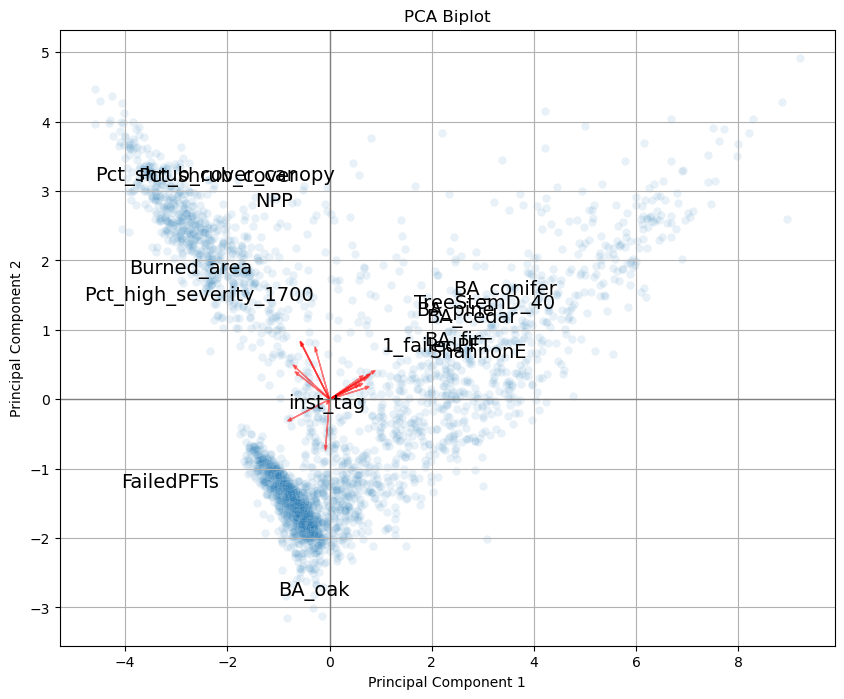

In [155]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df_pca = df3[basic_metrics]
tmp = tmp = df_pca['FailedPFTs'] == 1
df_pca['1_failedPFT'] = tmp.astype(int)

# Standardizing the features
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(df_pca_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualization of PCA scores
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, alpha=0.1)

# Adding feature vectors to plot (biplot)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = df_pca.columns
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0] * 4.15, loadings[i, 1] * 4.15, feature, color='black', ha='center', va='center', fontsize=14)

plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.show()

## Histograms of metrics

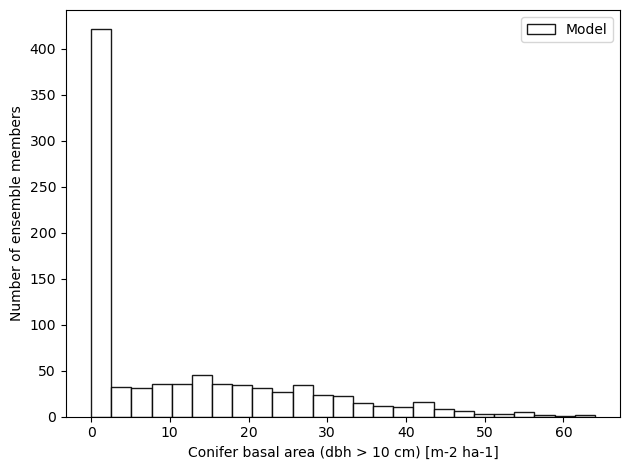

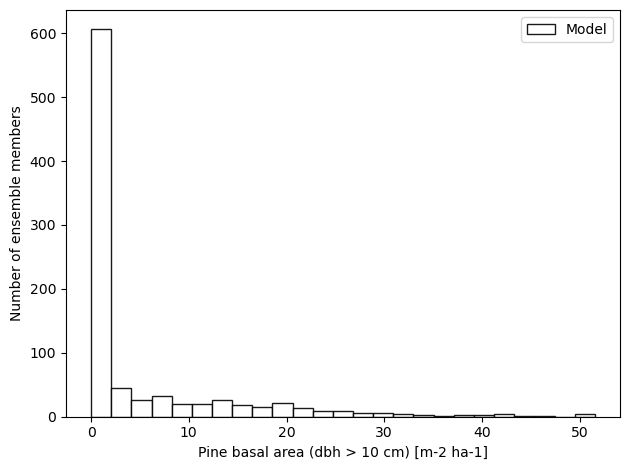

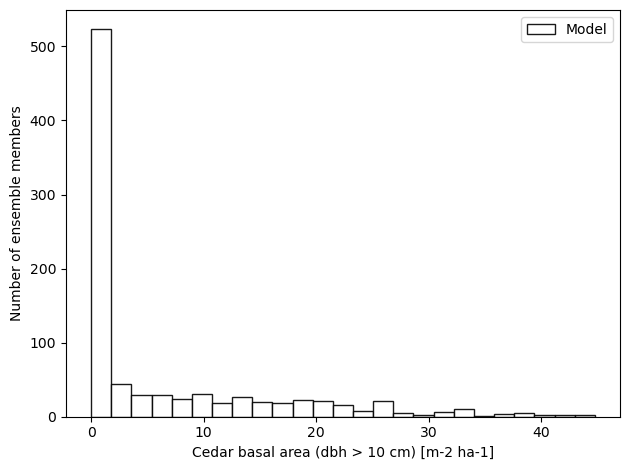

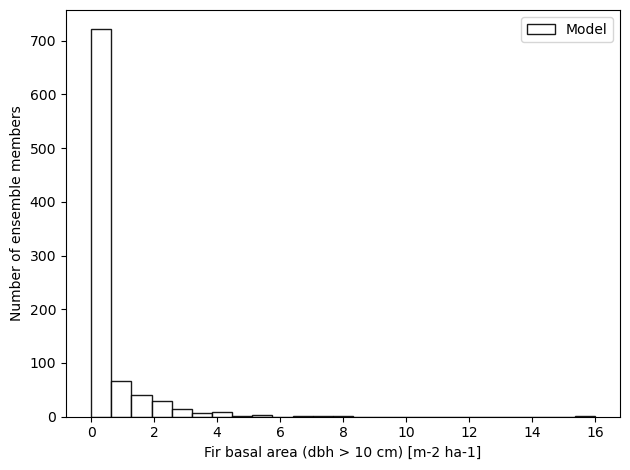

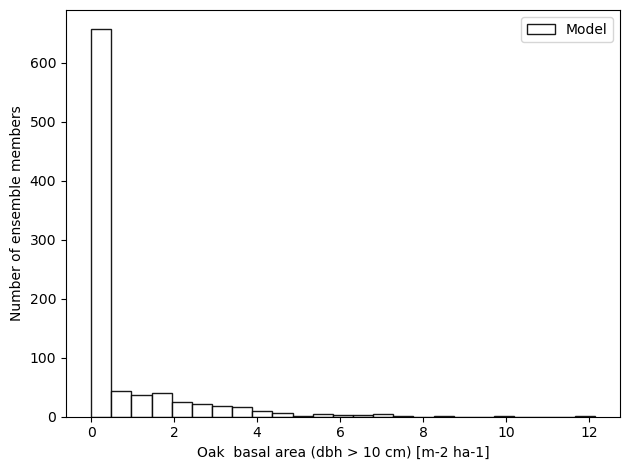

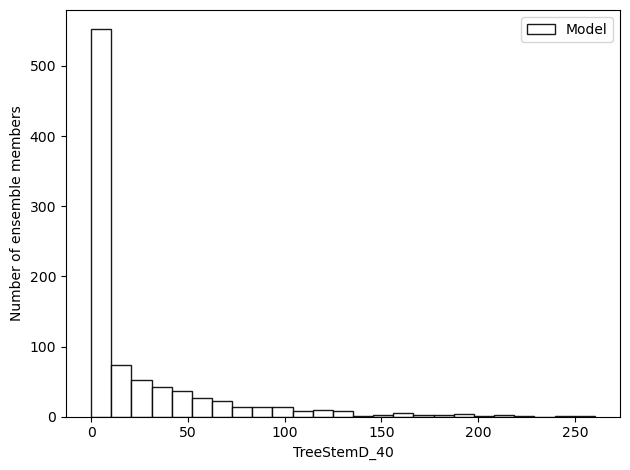

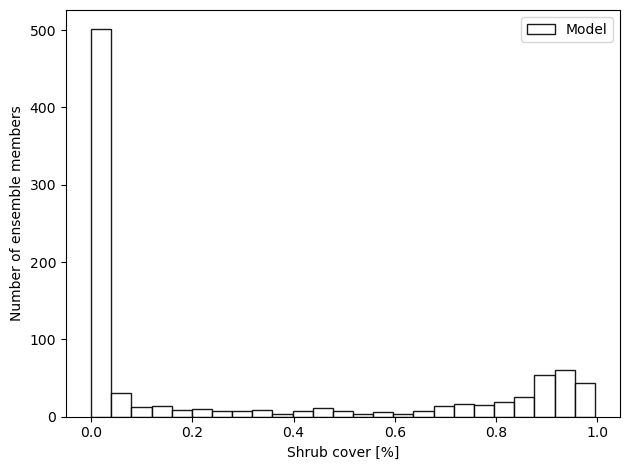

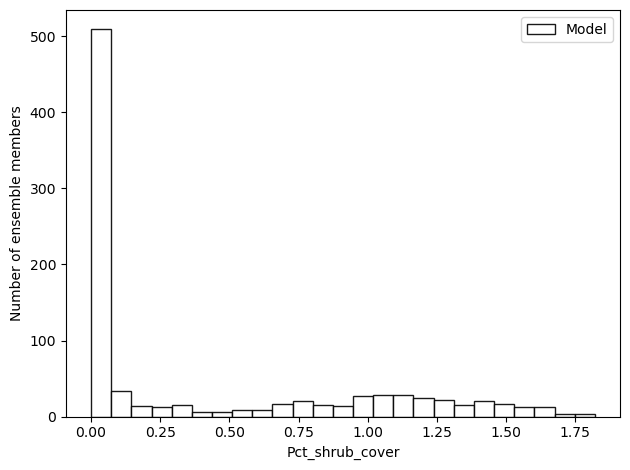

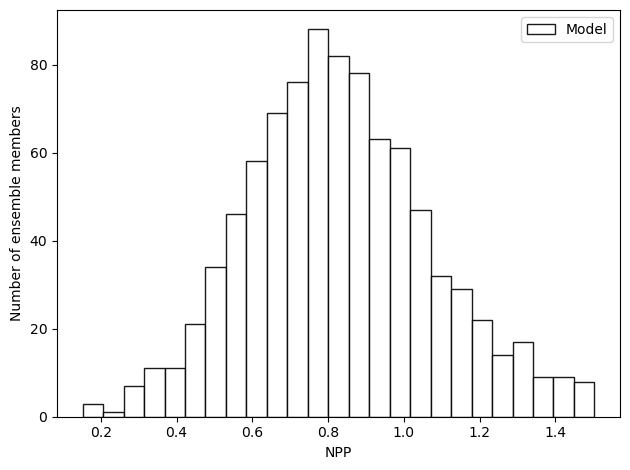

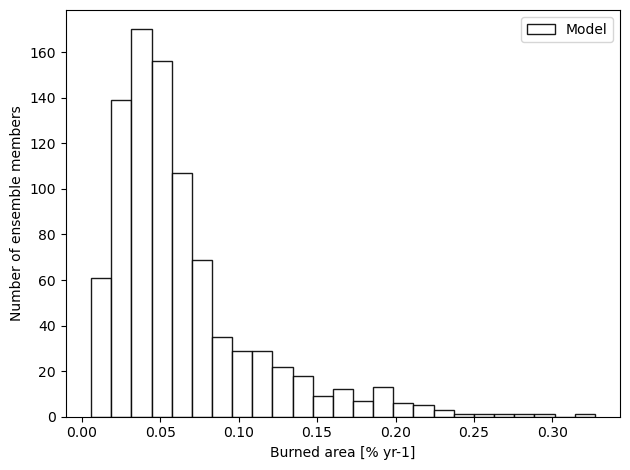

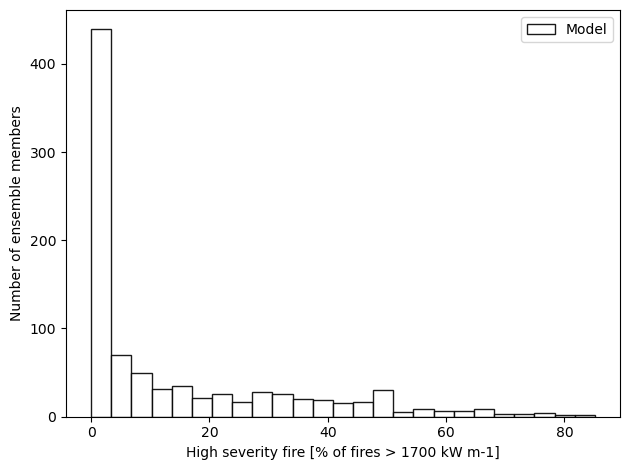

In [45]:
make_histograms_of_metrics(df[basic_metrics],basic_metrics)

## Histograms of params

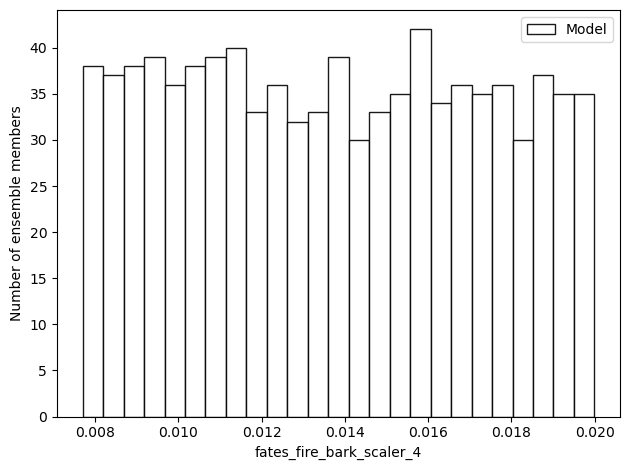

In [119]:
make_histograms_of_metrics(df,['fates_fire_bark_scaler_4'])

## Mortality rates

In [123]:
case = 'CZ2_equilibrium_041924_01_-17e2acb6a_FATES-1449c787'
inst_tag = "0007"

for inst_tag in oaks_fails_tags[:20]:
    mort_var_dict = {'fire':'FATES_MORTALITY_FIRE_SZPF',
                             'cstarve':'FATES_MORTALITY_CSTARV_SZPF',
                             'hydr':'FATES_MORTALITY_HYDRAULIC_SZPF',
                             'back':'FATES_MORTALITY_BACKGROUND_SZPF',
                             'sen':'FATES_MORTALITY_SENESCENCE_SZPF'}
    print("\n")
    print(inst_tag)
    ds = esm_tools.load_fates_output_data('/glade/derecho/scratch/adamhb',case,[1270,1275], fields = fields,
                               inst_tag = inst_tag, manual_path = None, save_processed_output = False)
    
    for mort_var in mort_var_dict.keys():
        mort_rate = esm_tools.get_mort_rate(ds = ds,pft_index = 4,mort_path = mort_var,mort_metric = 'per_cap')
        if len(mort_rate) > 1:
            mort_rate = np.array(mort_rate).mean() * 12 * 100
        
        print(mort_var,":",mort_rate, '% yr -1')



0003
-- your data have been read in -- 
fire : 2.0215746480971575 % yr -1
cstarve : 5.735255219042301 % yr -1
hydr : 0.0 % yr -1
back : 0.14411736920010298 % yr -1
sen : 0.0 % yr -1


0005
-- your data have been read in -- 
fire : 9.910821542143822 % yr -1
cstarve : 17.098956182599068 % yr -1
hydr : 0.0 % yr -1
back : 0.06305251299636438 % yr -1
sen : 0.0 % yr -1


0015
-- your data have been read in -- 
fire : 5.807176977396011 % yr -1
cstarve : 12.07106038928032 % yr -1
hydr : 0.0 % yr -1
back : 0.1994873397052288 % yr -1
sen : 0.0 % yr -1


0021
-- your data have been read in -- 
fire : 1.0579017223790288 % yr -1
cstarve : 5.714515037834644 % yr -1
hydr : 0.0 % yr -1
back : 0.09736475476529449 % yr -1
sen : 0.0 % yr -1


0025
-- your data have been read in -- 
fire : 1.3212606310844421 % yr -1
cstarve : 13.881638646125793 % yr -1
hydr : 0.0 % yr -1
back : 0.10559000365901738 % yr -1
sen : 0.0 % yr -1


0026
-- your data have been read in -- 
fire : 1.5191090293228626 % yr -1
cstar

## Ignitions

In [35]:
case = 'sup_043024-1951-2020_-17e2acb6a_FATES-1449c787'
m2_per_km2 = 1e6
s_per_yr = 3.154e7
tags_from_first_700yr =  ['0011', '0024', '0048', '0054', '0064', '0065', '0067', '0092']

ignition_rate = []
for inst_tag in tags_from_first_700yr:
    print("working on",inst_tag)
    ds = esm_tools.load_fates_output_data('/glade/derecho/scratch/adamhb',case,
                                          years = list(range(1980,2015)), fields = 'FATES_IGNITIONS',
                                          inst_tag = inst_tag, manual_path = None, save_processed_output = False)
    ignitions_per_m2_per_s = ds['FATES_IGNITIONS'].mean().values 
    print(ignitions_per_m2_per_s)
    ignitions_per_km2_per_yr = ignitions_per_m2_per_s * m2_per_km2 * s_per_yr
    print(ignitions_per_km2_per_yr)
    ignition_rate.append(ignitions_per_km2_per_yr)

working on 0011
-- your data have been read in -- 
2.5358266e-18
7.997997094298304e-05
working on 0024
-- your data have been read in -- 
9.883763e-17
0.0031173387756755263
working on 0048
-- your data have been read in -- 
1.8359338e-17
0.0005790535273232483
working on 0054
-- your data have been read in -- 
3.6522005e-18
0.00011519040421718433
working on 0064
-- your data have been read in -- 
5.043139e-17
0.0015906060017255427
working on 0065
-- your data have been read in -- 
1.142369e-16
0.0036030317747936785
working on 0067
-- your data have been read in -- 
2.5621384e-19
8.080984637038505e-06
working on 0092
-- your data have been read in -- 
2.882271e-17
0.0009090683174839697


In [36]:
parameter_value = 0.0356

In [37]:
f = np.array(ignition_rate).mean()
p = parameter_value / f
print("new value",p)

new value 28.47330946474903
